<a href="https://colab.research.google.com/github/kiokomutunga/Machine-Learning/blob/main/Tomato_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATASET_PATH = "/content/drive/MyDrive/TomatoDataset"


In [4]:
import os
os.listdir(DATASET_PATH)


['cnn_train.py', 'train', 'test']

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np


In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 10


In [7]:
# Training + validation generator with split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",     # This is the training split
    shuffle=True
)





Found 8000 images belonging to 10 classes.


In [8]:
# Validation generator
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",   # This is the validation split
    shuffle=False
)

Found 2000 images belonging to 10 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    DATASET_PATH + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 984 images belonging to 10 classes.


In [10]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False  # Stage 1


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)



In [12]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:
history_1 = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5238s 21s/step - accuracy: 0.1100 - loss: 2.4783 - val_accuracy: 0.4278 - val_loss: 2.1487
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 552ms/step - accuracy: 0.2261 - loss: 2.1478 - val_accuracy: 0.5193 - val_loss: 1.9907
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 544ms/step - accuracy: 0.3755 - loss: 1.9796 - val_accuracy: 0.5325 - val_loss: 1.8570
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 550ms/step - accuracy: 0.4511 - loss: 1.8365 - val_accuracy: 0.5589 - val_loss: 1.7343
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 137s 545ms/step - accuracy: 0.4849 - loss: 1.7375 - val_accuracy: 0.5915 - val_loss: 1.6180
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 545ms/step - accuracy: 0.5074 - loss: 1.6451 - val_accuracy: 0.5955 - val_loss: 1.5272
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 137s 547ms/step - accuracy: 0.5344 - loss: 1.5596 - val_accuracy: 0.6087 - val_loss: 1.4499
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 551ms/step - accuracy: 0.5507 - 

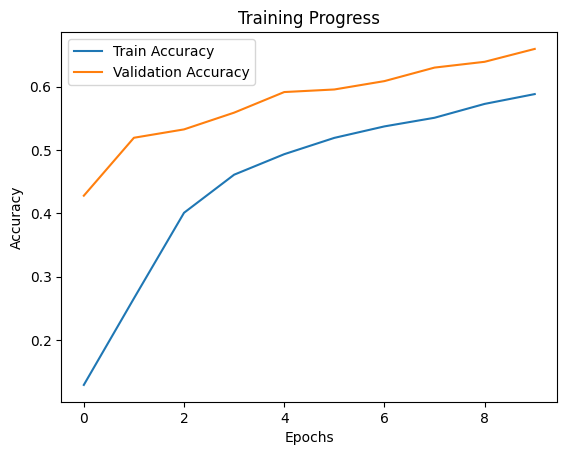

In [14]:
import matplotlib.pyplot as plt

plt.plot(history_1.history["accuracy"], label="Train Accuracy")
plt.plot(history_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


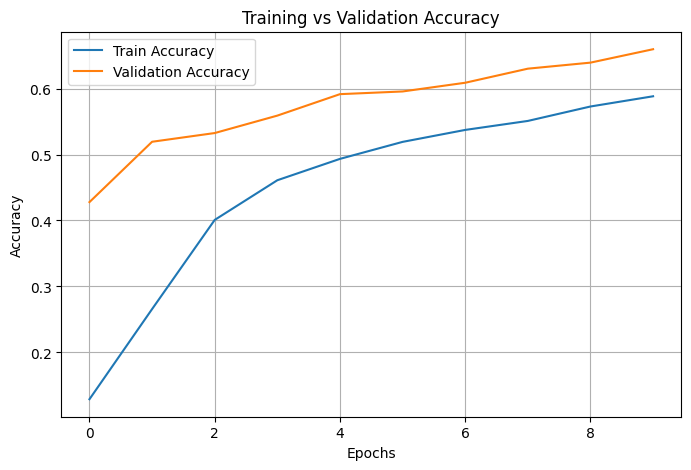

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_1.history["accuracy"], label="Train Accuracy")
plt.plot(history_1.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


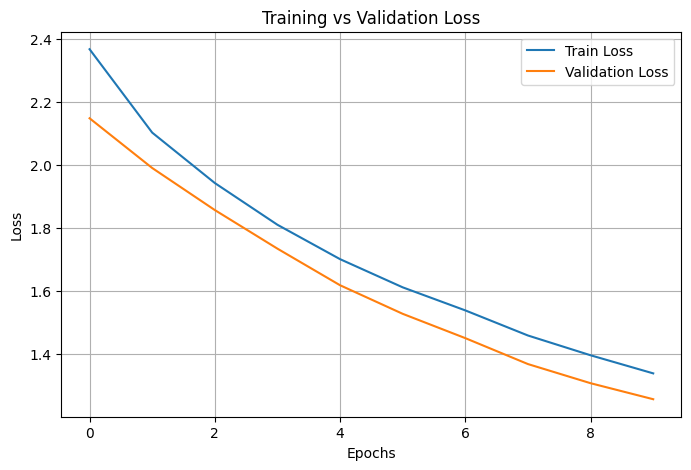

In [16]:
plt.figure(figsize=(8,5))
plt.plot(history_1.history["loss"], label="Train Loss")
plt.plot(history_1.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=7,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "content/drive/MyDrive/best_vgg16_tomato_model.keras",
    monitor="val_accuracy",
    save_best_only=True
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint],
    initial_epoch=len(history_1.history["accuracy"])
)

model.save("/content/drive/MyDrive/final_vgg16_tomato_model.keras")

Epoch 11/50
182/250 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accuracy: 0.5809 - loss: 1.3173